(100000, 150)
(100000,)
[  1 129  88   2   5]
max SOST value = 29.64597157526155


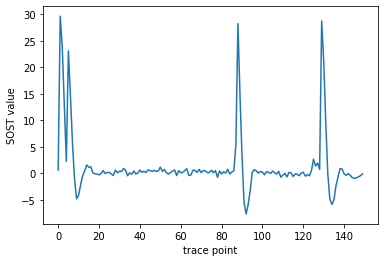

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#################################################
data_folder = "../traces/puf0_avg100/" # original: "../traces/puf0_avg0\"
 
size = 150	
			   			   	 
#################################################

traces = np.load(data_folder+'trace.npy')
labels = np.load(data_folder+'label.npy')

for i in range(1,10):  
	tempTrace = np.load(data_folder+'trace'+str(i)+'.npy')
	tempLabel = np.load(data_folder+'label'+str(i)+'.npy')

	traces = np.append(traces,tempTrace,axis=0)
	labels = np.append(labels,tempLabel,axis=0)
	
print(traces.shape)
print(labels.shape)
  
tempLabels = []
for i in range(labels.size):
	tempLabels += list(np.binary_repr(labels[i], width = 1))
delimitedLabels = np.array(tempLabels).astype(int)

trace_0 = traces[np.where(delimitedLabels == 0)]
trace_1 = traces[np.where(delimitedLabels == 1)]

(statistic,pvalue) = stats.ttest_ind(trace_0, trace_1, equal_var = False)

plt.plot(statistic) 
plt.ylabel('SOST value')
plt.xlabel('trace point')

m_index = statistic.argsort()[-5:][::-1]
print(m_index)

tmp = statistic[m_index][0]
print('max SOST value =', tmp)

plt.show()